# **Introduction**
In this notebook, I will be using the 'NYC Property Sales' data set to predict the sale price of residential properties in NYC. This data set inculdes a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.  

We will have to explore, clean, visualize, engineer, and apply other data manipulation tactics to properly be able to estimate sale price.

Follow along this notebook to see how I did so from start to finish.

In [ ]:
# Some essential imports
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
# keep a copy of the raw data
df0 = pd.read_csv("nyc-rolling-sales.csv")

In [ ]:
# read in the data frame
df = pd.read_csv("nyc-rolling-sales.csv")
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# Data Exploring + Cleaning

First we have to explore and clean the data. Often a dataset will come with missing or wrongly imputed values.  We must emplore and decide how to handle these flaws with the data set.

Furthermore, for our goal of predicting sale price we may not need all of the features available to us, we must also decide which features to drop, which ones to keep, and what new features we can engineer.

In [ ]:
# lets take a look at the columns, damn there are a lot, we might need to get rid of some
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [ ]:
# Quick look at the shape, it looks like there is a lot of data so dropping values should not impact the model too harshly.
df.shape

(84548, 22)

In [ ]:
df = df.dropna()
df.drop_duplicates(keep = "last", inplace=True)

In [ ]:
df[["TOTAL UNITS", "SALE PRICE"]].groupby(['TOTAL UNITS'], as_index=False).count().sort_values(by='SALE PRICE', ascending=False)

,TOTAL UNITS,SALE PRICE
1,1,38356
0,0,19762
2,2,15914
3,3,5412
4,4,1498
...,...,...
124,145,1
123,143,1
122,142,1
121,140,1


In [ ]:
# Removing 0 units and the one 2261 units outlier
df = df[(df['TOTAL UNITS'] != 0) & (df['TOTAL UNITS'] != 2261)]

In [ ]:
# removing rows which have year built as 0
df = df[df['YEAR BUILT'] != 0]

In [ ]:
# same with sqft
df = df[df["LAND SQUARE FEET"] != 0]
df = df[df["GROSS SQUARE FEET"] != 0]

In [ ]:
df.shape

(60713, 22)

In [ ]:
df = df.drop(['Unnamed: 0', 'EASE-MENT', 'ADDRESS', 'SALE DATE', 'TAX CLASS AT PRESENT', 'LOT','APARTMENT NUMBER', 'COMMERCIAL UNITS','TOTAL UNITS','BUILDING CLASS AT TIME OF SALE','NEIGHBORHOOD','BLOCK','BUILDING CLASS AT PRESENT'], axis=1)
df.head()

,BOROUGH,BUILDING CLASS CATEGORY,ZIP CODE,RESIDENTIAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,10009,5,1633,6440,1900,2,6625000
1,1,07 RENTALS - WALKUP APARTMENTS,10009,28,4616,18690,1900,2,-
2,1,07 RENTALS - WALKUP APARTMENTS,10009,16,2212,7803,1900,2,-
3,1,07 RENTALS - WALKUP APARTMENTS,10009,10,2272,6794,1913,2,3936272
4,1,07 RENTALS - WALKUP APARTMENTS,10009,6,2369,4615,1900,2,8000000


In [ ]:
# renaming the columns with no spaces
df.columns = ['BOROUGH','BUILDING_CLASS_CATEGORY','ZIP_CODE','RESIDENTIAL_UNITS','LAND_SQUARE_FEET','GROSS_SQUARE_FEET','YEAR_BUILT',
       'TAX_CLASS_AT_TIME_OF_SALE','SALE_PRICE']

In [ ]:
df['SALE_PRICE'] = pd.to_numeric(df['SALE_PRICE'], errors='coerce')
df = df.dropna(subset=['SALE_PRICE'])
df.shape

(49127, 9)

In [ ]:
df['LAND_SQUARE_FEET'] = pd.to_numeric(df['LAND_SQUARE_FEET'], errors='coerce')
df = df.dropna(subset=['LAND_SQUARE_FEET'])
df.shape

(41568, 9)

In [ ]:
df['GROSS_SQUARE_FEET'] = pd.to_numeric(df['GROSS_SQUARE_FEET'], errors='coerce')
df = df.dropna(subset=['GROSS_SQUARE_FEET'])
df.shape

(41423, 9)

In [ ]:
df1 = df.copy()
df1.head()

,BOROUGH,BUILDING_CLASS_CATEGORY,ZIP_CODE,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE
0,1,07 RENTALS - WALKUP APARTMENTS,10009,5,1633.0,6440.0,1900,2,6625000.0
3,1,07 RENTALS - WALKUP APARTMENTS,10009,10,2272.0,6794.0,1913,2,3936272.0
4,1,07 RENTALS - WALKUP APARTMENTS,10009,6,2369.0,4615.0,1900,2,8000000.0
6,1,07 RENTALS - WALKUP APARTMENTS,10009,8,1750.0,4226.0,1920,2,3192840.0
9,1,08 RENTALS - ELEVATOR APARTMENTS,10009,24,4489.0,18523.0,1920,2,16232000.0


# Data Exploration + Engineering

We need to deal with the large number of building classifications. In this model, we are only trying to predict the price of residential properties.  Most of the buiding classifications are actually not related to residential properties (ex. J -> Theatres, Q -> Recreational facilities).  We need a way to filter out these properties so that we only are working with residential properties.

**TAX CLASS**

The tax class is atually a great way to do this.
- Class 1 - residential prop
- Class 2 - residential prop
- Class 3 - utilities, company owned prop
- Class 4 - factories, garages, offices, warehouses, etc.

From this information we can decide to just use class 1 and 2 to identify residential property.



In [ ]:
df1['TAX_CLASS_AT_TIME_OF_SALE'].value_counts()

1    31660
2     6987
4     2776
Name: TAX_CLASS_AT_TIME_OF_SALE, dtype: int64

In [ ]:
# strip the first few numbers and space
df1['BUILDING_CLASS_CATEGORY'] = df1['BUILDING_CLASS_CATEGORY'].str.slice(3)
df1['BUILDING_CLASS_CATEGORY'] = df1['BUILDING_CLASS_CATEGORY'].str.strip()

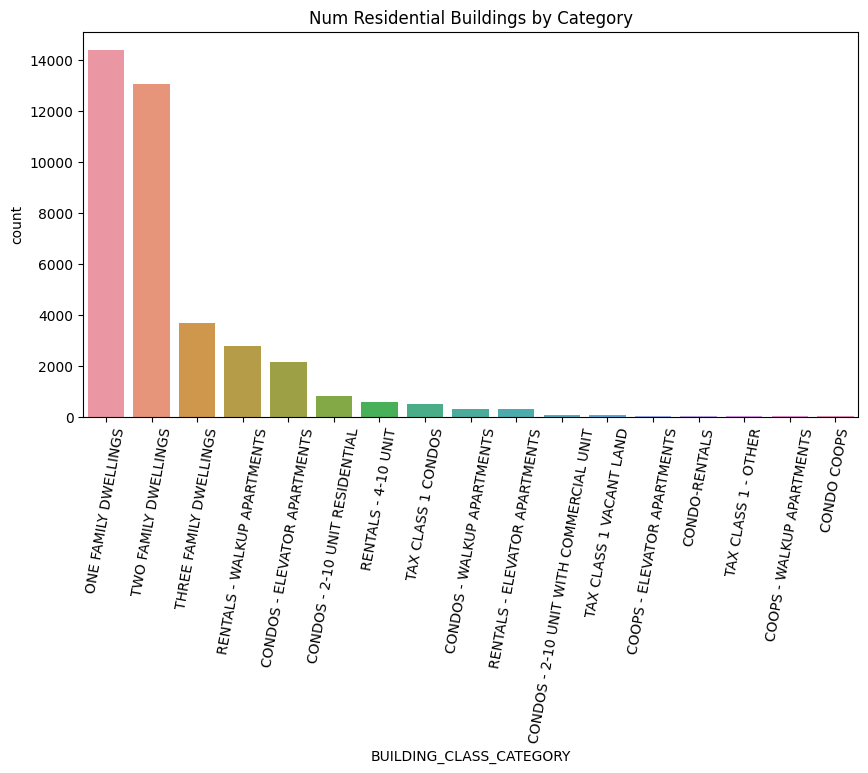

In [ ]:
# locate only residential properties (tax class 1 and 2)
residential_data = df1.loc[df1['TAX_CLASS_AT_TIME_OF_SALE'].isin([1,2])]

# create a plot to visualize
plt.figure(figsize=(10,5))

plot = sns.countplot(data=residential_data, x='BUILDING_CLASS_CATEGORY', order=residential_data['BUILDING_CLASS_CATEGORY'].value_counts().index)
plot.set_xticklabels(plot.get_xticklabels(), rotation=80)
plt.title('Num Residential Buildings by Category')
plt.show()

In [ ]:
residential_data['BUILDING_CLASS_CATEGORY'].value_counts()

ONE FAMILY DWELLINGS                       14393
TWO FAMILY DWELLINGS                       13040
THREE FAMILY DWELLINGS                      3656
RENTALS - WALKUP APARTMENTS                 2781
CONDOS - ELEVATOR APARTMENTS                2151
CONDOS - 2-10 UNIT RESIDENTIAL               802
RENTALS - 4-10 UNIT                          554
TAX CLASS 1 CONDOS                           509
CONDOS - WALKUP APARTMENTS                   290
RENTALS - ELEVATOR APARTMENTS                285
CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       50
TAX CLASS 1 VACANT LAND                       45
COOPS - ELEVATOR APARTMENTS                   34
CONDO-RENTALS                                 25
TAX CLASS 1 - OTHER                           17
COOPS - WALKUP APARTMENTS                     13
CONDO COOPS                                    2
Name: BUILDING_CLASS_CATEGORY, dtype: int64

**What to take from the plot**
- It looks like most of our data consists of one or two family dwellings, this is good information to know. One of my primary goals for this model is to predict the sale price for future home owners in NYC, and the fact that this data set provides substantial informaation on this I can hope for strong accuracy and precision for the models predicted sales price.
- We need to still change/remove some of these catagories
  *   I am going to remove vacant land (irrelivent)
  *   I am going to remove 'Tax class 1 - Other' (can't really classify this)
  *   I am going to remove 'SPECIAL CONDO BILLING LOTS ' (There is literally 1 of these)




In [ ]:
# Don't need the tax class anymore
residential_data = residential_data.drop(['TAX_CLASS_AT_TIME_OF_SALE'], axis=1)

In [ ]:
# remove vacant land
residential_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains("VACANT LAND") == False]

In [ ]:
# remove 'Tax class 1 - Other'
residential_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains("OTHER") == False]

In [ ]:
# remove 'special category'
residential_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains("SPECIAL") == False]

In [ ]:
residential_data['BUILDING_CLASS_CATEGORY'].value_counts()

ONE FAMILY DWELLINGS                       14393
TWO FAMILY DWELLINGS                       13040
THREE FAMILY DWELLINGS                      3656
RENTALS - WALKUP APARTMENTS                 2781
CONDOS - ELEVATOR APARTMENTS                2151
CONDOS - 2-10 UNIT RESIDENTIAL               802
RENTALS - 4-10 UNIT                          554
TAX CLASS 1 CONDOS                           509
CONDOS - WALKUP APARTMENTS                   290
RENTALS - ELEVATOR APARTMENTS                285
CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       50
COOPS - ELEVATOR APARTMENTS                   34
CONDO-RENTALS                                 25
COOPS - WALKUP APARTMENTS                     13
CONDO COOPS                                    2
Name: BUILDING_CLASS_CATEGORY, dtype: int64

I want to reduce the dimensionality, and I see there are a lot of cassifications of condos and coops, some have such few data points that it may be better to remove them or combine them somehow. Lets explore a little more about these catagories and see what we can come up with.

In [ ]:
# taking a look at the condo data
condo_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains('CONDO')]
condo_data.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].mean()


BUILDING_CLASS_CATEGORY
CONDO COOPS                                0.000000e+00
CONDO-RENTALS                              9.424547e+06
CONDOS - 2-10 UNIT RESIDENTIAL             7.576783e+05
CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT    2.340966e+05
CONDOS - ELEVATOR APARTMENTS               1.141514e+06
CONDOS - WALKUP APARTMENTS                 5.684854e+05
TAX CLASS 1 CONDOS                         5.657634e+05
Name: SALE_PRICE, dtype: float64

*   Lets get rid of 'CONDO COOPS'
*   Lets get rid of 'CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT'
*   Lets get rid of 'CONDO-RENTALS'
*   Lets combine TAX CLASS 1 CONDOS and CONDOS - WALKUP APARTMENTS bc their means are similar and seem to be refering to the same thing
*   **Note:** we already got rid of 'SPECIAL CONDO BILLING LOTS'

In [ ]:
round(condo_data.describe([0.05,0.10,0.75,0.85,0.95,0.99,0.995,0.999]),2)

,BOROUGH,ZIP_CODE,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,3829.00,3829.00,3829.00,3829.00,3829.00,3829.00,3.829000e+03
mean,2.94,11175.16,1.39,77.55,291.65,1991.25,9.828175e+05
std,0.24,182.56,7.77,1895.99,5740.87,38.79,2.817147e+06
min,1.00,10013.00,0.00,0.00,0.00,1800.00,0.000000e+00
5%,2.00,10469.80,1.00,0.00,0.00,1905.00,0.000000e+00
10%,3.00,11201.00,1.00,0.00,0.00,1920.00,0.000000e+00
50%,3.00,11217.00,1.00,0.00,0.00,2008.00,7.400000e+05
75%,3.00,11235.00,1.00,0.00,0.00,2014.00,1.175000e+06
85%,3.00,11238.00,1.00,0.00,0.00,2015.00,1.550000e+06
95%,3.00,11249.00,1.00,0.00,0.00,2015.00,2.600000e+06


So for some reason it looks like all the condo data was input with no sqft values, and for this reason I will be taking out all condo data from my data set.

In [ ]:
residential_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains('CONDO') == False]

In [ ]:
# taking a look at the coop data
coop_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains('COOPS')]
coop_data.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].mean()

BUILDING_CLASS_CATEGORY
COOPS - ELEVATOR APARTMENTS    8.666394e+05
COOPS - WALKUP APARTMENTS      1.598893e+06
Name: SALE_PRICE, dtype: float64

Honestly, I don't love the coop category, there is very few data for it compared to the other catagories and we havent even removed outliers yet, I'm going to get rif of it completely, this will help with the dimentionality anyway.

In [ ]:
residential_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains("COOP") == False]

In [ ]:
# taking a look at rental data
rental_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains('RENTAL')]
rental_data.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].mean()

BUILDING_CLASS_CATEGORY
RENTALS - 4-10 UNIT              1.461622e+06
RENTALS - ELEVATOR APARTMENTS    1.721680e+07
RENTALS - WALKUP APARTMENTS      2.156932e+06
Name: SALE_PRICE, dtype: float64

In [ ]:
round(rental_data.describe([0.05,0.10,0.75,0.85,0.95,0.99,0.995,0.999]),2)

,BOROUGH,ZIP_CODE,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,3620.00,3620.00,3620.00,3620.00,3620.00,3620.00,3.620000e+03
mean,2.68,10935.54,15.30,4883.46,12997.88,1928.29,3.236175e+06
std,0.88,470.89,48.47,16918.63,38352.53,25.29,1.383455e+07
min,1.00,10001.00,2.00,625.00,0.00,1800.00,0.000000e+00
5%,1.00,10024.00,3.00,1600.00,2400.00,1900.00,0.000000e+00
10%,1.00,10031.00,4.00,1800.00,2800.00,1905.00,0.000000e+00
50%,3.00,11212.00,6.00,2500.00,4900.00,1927.00,7.735000e+05
75%,3.00,11226.00,10.00,3640.75,8705.00,1931.00,2.450000e+06
85%,3.00,11235.00,20.00,5046.00,15744.75,1931.00,5.075000e+06
95%,4.00,11373.00,48.00,12000.00,45310.00,2004.00,1.300000e+07


For now, I think I am going to leave these alone

In [ ]:
# taking a look at family home data
family_home_data = residential_data[residential_data['BUILDING_CLASS_CATEGORY'].str.contains('FAMILY')]
family_home_data.groupby('BUILDING_CLASS_CATEGORY')['SALE_PRICE'].mean()

BUILDING_CLASS_CATEGORY
ONE FAMILY DWELLINGS      589184.969638
THREE FAMILY DWELLINGS    639251.403720
TWO FAMILY DWELLINGS      604897.129218
Name: SALE_PRICE, dtype: float64

I like these catagories staying seperate for now so I am going to keep these the way they are

In [ ]:
residential_data['BUILDING_CLASS_CATEGORY'].value_counts()

ONE FAMILY DWELLINGS             14393
TWO FAMILY DWELLINGS             13040
THREE FAMILY DWELLINGS            3656
RENTALS - WALKUP APARTMENTS       2781
RENTALS - 4-10 UNIT                554
RENTALS - ELEVATOR APARTMENTS      285
Name: BUILDING_CLASS_CATEGORY, dtype: int64

Now there is...

*   3 types of Rental properties
*   3 types of family houses



Now for some imputation and outlier removal. We want to make sure that our data is not filled with irregular values that could disrupt our model, there are many ways this can happen.


*   Missing values
*   Values that are listed as 0 for some reason
*   Outliers that do not represent the data well
*   Values that are just strait up wrong and are noticeably so


In [ ]:
# Rental Data
round(rental_data.describe([0.05,0.10,0.75,0.85,0.95,0.99,0.995,0.999]),2)

,BOROUGH,ZIP_CODE,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,3620.00,3620.00,3620.00,3620.00,3620.00,3620.00,3.620000e+03
mean,2.68,10935.54,15.30,4883.46,12997.88,1928.29,3.236175e+06
std,0.88,470.89,48.47,16918.63,38352.53,25.29,1.383455e+07
min,1.00,10001.00,2.00,625.00,0.00,1800.00,0.000000e+00
5%,1.00,10024.00,3.00,1600.00,2400.00,1900.00,0.000000e+00
10%,1.00,10031.00,4.00,1800.00,2800.00,1905.00,0.000000e+00
50%,3.00,11212.00,6.00,2500.00,4900.00,1927.00,7.735000e+05
75%,3.00,11226.00,10.00,3640.75,8705.00,1931.00,2.450000e+06
85%,3.00,11235.00,20.00,5046.00,15744.75,1931.00,5.075000e+06
95%,4.00,11373.00,48.00,12000.00,45310.00,2004.00,1.300000e+07


In [ ]:
print(f"Land Sqft units which are 0: {len(rental_data[rental_data['LAND_SQUARE_FEET']==0])}")
print(f"Gross Sqft units which are 0: {len(rental_data[rental_data['GROSS_SQUARE_FEET']==0])}")
print(f"Year built which are 0: {len(rental_data[rental_data['YEAR_BUILT']==0])}")
print(f"Zip Code which are 0: {len(rental_data[rental_data['ZIP_CODE']==0])}")
print(f"Borough which are 0: {len(rental_data[rental_data['BOROUGH']==0])}")
print(f"Sale Price which are 0: {len(rental_data[rental_data['SALE_PRICE']==0])}")

Land Sqft units which are 0: 0
Gross Sqft units which are 0: 17
Year built which are 0: 0
Zip Code which are 0: 0
Borough which are 0: 0
Sale Price which are 0: 1275


In [ ]:
rental_data.shape

(3620, 8)

In [ ]:
# Family Home Data
round(family_home_data.describe([0.05,0.10,0.20,0.75,0.85,0.95,0.99,0.995,0.999]),2)

,BOROUGH,ZIP_CODE,RESIDENTIAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
count,31089.00,31089.00,31089.00,31089.00,31089.00,31089.00,31089.00
mean,3.50,11028.46,1.66,2921.42,1998.38,1939.98,601663.00
std,0.93,464.02,0.68,1843.87,873.41,30.64,908708.64
min,1.00,0.00,1.00,200.00,0.00,1800.00,0.00
5%,2.00,10305.00,1.00,1440.00,988.00,1899.00,0.00
10%,2.00,10309.00,1.00,1667.00,1120.00,1901.00,0.00
20%,3.00,10461.00,1.00,1900.00,1280.00,1915.00,100.00
50%,3.00,11221.00,2.00,2496.00,1824.00,1930.00,498888.00
75%,4.00,11366.00,2.00,3500.00,2430.00,1960.00,765000.00
85%,5.00,11414.00,2.00,4000.00,2864.00,1975.00,950000.00


In [ ]:
print(f"Land Sqft units which are 0: {len(family_home_data[family_home_data['LAND_SQUARE_FEET']==0])}")
print(f"Gross Sqft units which are 0: {len(family_home_data[family_home_data['GROSS_SQUARE_FEET']==0])}")
print(f"Year built which are 0: {len(family_home_data[family_home_data['YEAR_BUILT']==0])}")
print(f"Zip Code which are 0: {len(family_home_data[family_home_data['ZIP_CODE']==0])}")
print(f"Borough which are 0: {len(family_home_data[family_home_data['BOROUGH']==0])}")
print(f"Sale Price which are 0: {len(family_home_data[family_home_data['SALE_PRICE']==0])}")


Land Sqft units which are 0: 0
Gross Sqft units which are 0: 32
Year built which are 0: 0
Zip Code which are 0: 6
Borough which are 0: 0
Sale Price which are 0: 5634


In [ ]:
family_home_data.shape

(31089, 8)

In most features we have a few 0 values when compared to the amount of data we have. So in this case what I am going to do is just drop these rows, we have pleanty of data to spare.

But, in the case of the sale price, we have a lot of missing values, especially for the rental data set. So we should probably imput these values.
I am going to do this by imputing the mean based on the Borough and building classification.

In [ ]:
rental_data = rental_data.drop(rental_data[rental_data['GROSS_SQUARE_FEET']==0].index)

In [ ]:
sp_by_borough = rental_data[['BOROUGH','BUILDING_CLASS_CATEGORY','SALE_PRICE']]
# remove outliers, this is based on the describe()
sp_by_borough = sp_by_borough[sp_by_borough["SALE_PRICE"] > 1000000]
sp_by_borough = sp_by_borough[sp_by_borough["SALE_PRICE"] < 13000000]

In [ ]:
mean = sp_by_borough.groupby(['BOROUGH', 'BUILDING_CLASS_CATEGORY'])['SALE_PRICE'].mean()
print("Mean SALE_PRICE By BOROUGH & Building Class:\n",mean)

Mean SALE_PRICE By BOROUGH & Building Class:
 BOROUGH  BUILDING_CLASS_CATEGORY      
1        RENTALS - 4-10 UNIT              6.269687e+06
         RENTALS - ELEVATOR APARTMENTS    8.400735e+06
         RENTALS - WALKUP APARTMENTS      5.671362e+06
2        RENTALS - 4-10 UNIT              2.090076e+06
         RENTALS - ELEVATOR APARTMENTS    7.259123e+06
         RENTALS - WALKUP APARTMENTS      3.930456e+06
3        RENTALS - 4-10 UNIT              2.497481e+06
         RENTALS - ELEVATOR APARTMENTS    6.900365e+06
         RENTALS - WALKUP APARTMENTS      2.577389e+06
4        RENTALS - 4-10 UNIT              1.893081e+06
         RENTALS - ELEVATOR APARTMENTS    7.969603e+06
         RENTALS - WALKUP APARTMENTS      2.449637e+06
5        RENTALS - 4-10 UNIT              1.800000e+06
         RENTALS - WALKUP APARTMENTS      1.787740e+06
Name: SALE_PRICE, dtype: float64


In [ ]:
for index, row in rental_data.iterrows():
  if row['SALE_PRICE'] == 0:
    rental_data.at[index, 'SALE_PRICE'] = mean[row['BOROUGH'], row['BUILDING_CLASS_CATEGORY']]

In [ ]:
print(f"Land Sqft units which are 0: {len(rental_data[rental_data['LAND_SQUARE_FEET']==0])}")
print(f"Gross Sqft units which are 0: {len(rental_data[rental_data['GROSS_SQUARE_FEET']==0])}")
print(f"Year built which are 0: {len(rental_data[rental_data['YEAR_BUILT']==0])}")
print(f"Zip Code which are 0: {len(rental_data[rental_data['ZIP_CODE']==0])}")
print(f"Borough which are 0: {len(rental_data[rental_data['BOROUGH']==0])}")
print(f"Sale Price which are 0: {len(rental_data[rental_data['SALE_PRICE']==0])}")

Land Sqft units which are 0: 0
Gross Sqft units which are 0: 0
Year built which are 0: 0
Zip Code which are 0: 0
Borough which are 0: 0
Sale Price which are 0: 0


Now we do the same with the family home data

In [ ]:
family_home_data = family_home_data.drop(family_home_data[family_home_data['GROSS_SQUARE_FEET']==0].index)
family_home_data = family_home_data.drop(family_home_data[family_home_data['ZIP_CODE']==0].index)
family_home_data = family_home_data.drop(family_home_data[family_home_data['SALE_PRICE']==0].index)

In [ ]:
sp_by_borough_fam = family_home_data[['BOROUGH','BUILDING_CLASS_CATEGORY','SALE_PRICE']]

# remove outliers, this is based on the describe()
sp_by_borough_fam = sp_by_borough_fam[sp_by_borough_fam["SALE_PRICE"] > 200000]
sp_by_borough_fam = sp_by_borough_fam[sp_by_borough_fam["SALE_PRICE"] < 2000000]

In [ ]:
family_mean = sp_by_borough_fam.groupby(['BOROUGH', 'BUILDING_CLASS_CATEGORY'])['SALE_PRICE'].mean()
print("Mean SALE_PRICE By BOROUGH & Building Class:\n",family_mean)

Mean SALE_PRICE By BOROUGH & Building Class:
 BOROUGH  BUILDING_CLASS_CATEGORY
1        ONE FAMILY DWELLINGS       1.188670e+06
         THREE FAMILY DWELLINGS     1.663053e+06
         TWO FAMILY DWELLINGS       1.223509e+06
2        ONE FAMILY DWELLINGS       4.485012e+05
         THREE FAMILY DWELLINGS     5.473228e+05
         TWO FAMILY DWELLINGS       4.973933e+05
3        ONE FAMILY DWELLINGS       7.379018e+05
         THREE FAMILY DWELLINGS     1.010945e+06
         TWO FAMILY DWELLINGS       8.703388e+05
4        ONE FAMILY DWELLINGS       6.276156e+05
         THREE FAMILY DWELLINGS     9.279933e+05
         TWO FAMILY DWELLINGS       7.277360e+05
5        ONE FAMILY DWELLINGS       5.055922e+05
         THREE FAMILY DWELLINGS     4.796957e+05
         TWO FAMILY DWELLINGS       5.987709e+05
Name: SALE_PRICE, dtype: float64


In [ ]:
for index, row in family_home_data.iterrows():
  if row['SALE_PRICE'] == 0:
    family_home_data.at[index, 'SALE_PRICE'] = family_mean[row['BOROUGH'], row['BUILDING_CLASS_CATEGORY']]

In [ ]:
# remove outliers, this is based on the describe()
family_home_data = family_home_data[family_home_data["SALE_PRICE"] > 200000]
family_home_data = family_home_data[family_home_data["SALE_PRICE"] < 2000000]

In [ ]:
family_home_data = family_home_data[family_home_data['GROSS_SQUARE_FEET'] > 900]
family_home_data = family_home_data[family_home_data['GROSS_SQUARE_FEET'] < 4500]

In [ ]:
family_home_data = family_home_data[family_home_data['LAND_SQUARE_FEET'] > 1475]
family_home_data = family_home_data[family_home_data['LAND_SQUARE_FEET'] < 8000]

In [ ]:
print(f"Land Sqft units which are 0: {len(family_home_data[family_home_data['LAND_SQUARE_FEET']==0])}")
print(f"Gross Sqft units which are 0: {len(family_home_data[family_home_data['GROSS_SQUARE_FEET']==0])}")
print(f"Year built which are 0: {len(family_home_data[family_home_data['YEAR_BUILT']==0])}")
print(f"Zip Code which are 0: {len(family_home_data[family_home_data['ZIP_CODE']==0])}")
print(f"Borough which are 0: {len(family_home_data[family_home_data['BOROUGH']==0])}")
print(f"Sale Price which are 0: {len(family_home_data[family_home_data['SALE_PRICE']==0])}")

Land Sqft units which are 0: 0
Gross Sqft units which are 0: 0
Year built which are 0: 0
Zip Code which are 0: 0
Borough which are 0: 0
Sale Price which are 0: 0


In [ ]:
family_home_data['BUILDING_CLASS_CATEGORY'] = family_home_data['BUILDING_CLASS_CATEGORY'].str.replace('ONE ', '1 ')
family_home_data['BUILDING_CLASS_CATEGORY'] = family_home_data['BUILDING_CLASS_CATEGORY'].str.replace('TWO ', '2 ')
family_home_data['BUILDING_CLASS_CATEGORY'] = family_home_data['BUILDING_CLASS_CATEGORY'].str.replace('THREE ', '3 ')

In [ ]:
family_home_data = family_home_data[(family_home_data['BUILDING_CLASS_CATEGORY'].str[0].astype(int) == family_home_data['RESIDENTIAL_UNITS'])]

In [ ]:
family_home_data = family_home_data.drop(['BUILDING_CLASS_CATEGORY'], axis=1)

# Training the Model

Its generally good to try multiple models with your data, as you may not know what type of model (in our case regression) will fair well with the distribution of the data. We will import several popular regression algos and try them all on the data

I am also going to split up the data between the rental and family home and test the models on each datasets separately.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import time


In [ ]:
lm = LinearRegression()
lgbm = lightgbm.LGBMRegressor(random_state = 42)
mlp = MLPRegressor(random_state = 42)
ridge = Ridge(random_state = 42)
lasso = Lasso(random_state = 42)
knn = KNeighborsRegressor()
rf = RandomForestRegressor(random_state = 42)
xgbt = xgb.XGBRegressor(random_state = 42)
dtree = DecisionTreeRegressor(random_state = 42)

First we make our model on just the family_home_data

In [ ]:
X = family_home_data.drop(['SALE_PRICE'], axis=1)
y = family_home_data['SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [ ]:
algo = [xgbt,lgbm,lm,ridge,lasso,knn,rf,dtree,mlp]
result = []

for i in algo:
        start = time.process_time()
        model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), model.score(X_train, y_train), model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
                  mean_absolute_error(y_train, model.predict(X_train)),
                  mean_absolute_error(y_test, model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(time.process_time()-start),"sn")

result_raw_model = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result_raw_model

XGBRegressor ✓     0.654471865000005 sn
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001088 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 755
[LightGBM] [Info] Number of data points in the train set: 18394, number of used features: 6
[LightGBM] [Info] Start training from score 678959.369794
LGBMRegressor ✓     0.6148015679999901 sn
LinearRegression ✓     0.03525864499999898 sn
Ridge ✓     0.05963955900000428 sn
Lasso ✓     0.09017210700000078 sn
KNeighborsRegressor ✓     0.6208089470000004 sn
RandomForestRegressor ✓     8.780443288 sn
DecisionTreeRegressor ✓     0.12506095100002312 sn
MLPRegressor ✓     35.963308882999996 sn


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
LGBMRegressor_baseline,0.685412,0.620623,180902.806546,203893.303916,125899.191096,138787.778227
XGBRegressor_baseline,0.787619,0.608189,148638.762452,207207.645723,104704.756202,140375.257690
RandomForestRegressor_baseline,0.928333,0.584207,86344.288579,213454.854878,57827.758354,145032.269259
KNeighborsRegressor_baseline,0.585260,0.385260,207712.270119,259545.257829,145842.999369,179326.303816
DecisionTreeRegressor_baseline,0.978942,0.285377,46803.750250,279837.461845,12600.763868,190640.740178
LinearRegression_baseline,0.242865,0.245866,280647.166028,287469.301809,210997.453971,213139.508276
Ridge_baseline,0.242865,0.245866,280647.166031,287469.315092,210997.502650,213139.548405
Lasso_baseline,0.242865,0.245866,280647.166038,287469.326398,210997.534211,213139.575519
MLPRegressor_baseline,0.215393,0.215293,285693.295995,293238.665909,215981.451966,218902.375939


# **Results**
This resulting data frame gives us some good insight on models.

### Decision Trees
It is interesting to see how well the decision trees did on the training set. Both the Decision Tree Regressor and the Random Forest Regressor had very high training scores, but did much on worse Test Scores (Unseen data). This suggests that the trees may be overfit.

Decision Trees can become overfit if they are complex and/or the depth is high.
This makes me think that we can improve the test scores by hypertuning the parameters better, maybe we add a max depth.

Another interesting thing to note is how the Random Forest Regressor was not as overfit as the normal Decision Tree Regressor. This makes sense, becuase the way a random forest operates (high level) is it runs multiple decision trees and can remove certain trees that did poorly, ultimatley reducing overfitting.
One caveat to this is performence time, as we can see from the time logs, the RandomForest Regressor took 9 seconds to run, which is one of two regressors that took over 1 second.

### LightGBM

The LightGBM did the best on the Test data (62p). The LightGBM regressor is a histogram based algorithm that is known for speed and accuracy. This is reflected in our analysis as it had the best accuracy and took 0.58 seconds to run.


### Linear Regression

I would like to point out how poorly the linear regression model did. It had similar training and testing accuracy (24p). This suggests that our data is not very linearly represented.  


In [ ]:
rental_data = rental_data.drop(['BUILDING_CLASS_CATEGORY'], axis=1)

In [ ]:
X = rental_data.drop(['SALE_PRICE'], axis=1)
y = rental_data['SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state = 42)

In [ ]:
algo = [xgbt,lgbm,lm,ridge,lasso,knn,rf,dtree,mlp]
result = []

for i in algo:
        start = time.process_time()
        model = i.fit(X_train,y_train)
        result.append([str(i).split("(")[0] + str("_baseline"), model.score(X_train, y_train), model.score(X_test, y_test),
                  np.sqrt(mean_squared_error(y_train, model.predict(X_train))),
                  np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
                  mean_absolute_error(y_train, model.predict(X_train)),
                  mean_absolute_error(y_test, model.predict(X_test))])
        print(str(i).split("(")[0],"✓    ", "{}".format(time.process_time()-start),"sn")

result_raw_model2 = pd.DataFrame(result, columns = ["Algorithm", "Train_Score", "Test_Score", "Train_Rmse",
                                         "Test_Rmse", "Train_Mae", "Test_Mae"]).sort_values("Test_Rmse").set_index("Algorithm")
result_raw_model2

XGBRegressor ✓     0.2774457600000062 sn
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 824
[LightGBM] [Info] Number of data points in the train set: 3242, number of used features: 6
[LightGBM] [Info] Start training from score 4253654.882788
LGBMRegressor ✓     0.169699621999996 sn
LinearRegression ✓     0.06864630999999122 sn
Ridge ✓     0.05804041100000745 sn
Lasso ✓     0.08423254100000577 sn
KNeighborsRegressor ✓     0.23623578699999825 sn
RandomForestRegressor ✓     1.5514498230000129 sn
DecisionTreeRegressor ✓     0.03631243999998901 sn
MLPRegressor ✓     6.522017019000003 sn


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Train_Score,Test_Score,Train_Rmse,Test_Rmse,Train_Mae,Test_Mae
Algorithm,,,,,,
XGBRegressor_baseline,0.987982,0.281110,1.542390e+06,8.352109e+06,7.295214e+05,2.400592e+06
LGBMRegressor_baseline,0.617038,0.278863,8.706580e+06,8.365151e+06,1.735616e+06,2.416414e+06
DecisionTreeRegressor_baseline,0.991323,0.275747,1.310572e+06,8.383204e+06,2.006165e+05,2.532493e+06
RandomForestRegressor_baseline,0.881651,0.146166,4.840069e+06,9.102308e+06,9.005583e+05,2.480507e+06
MLPRegressor_baseline,0.291933,0.112728,1.183878e+07,9.278831e+06,2.927461e+06,3.069502e+06
KNeighborsRegressor_baseline,0.437958,0.107763,1.054762e+07,9.304753e+06,2.165033e+06,3.020703e+06
Ridge_baseline,0.475322,0.020608,1.019099e+07,9.748618e+06,2.812621e+06,3.201975e+06
Lasso_baseline,0.475322,0.020600,1.019099e+07,9.748660e+06,2.812717e+06,3.202092e+06
LinearRegression_baseline,0.475322,0.020600,1.019099e+07,9.748661e+06,2.812717e+06,3.202092e+06


So the rental data did not do well with these models, what I am going to do is is do some hyperparameter optimization on the random forest regression model and see if I can improve my test accuracy a little bit.

In [ ]:
rf = RandomForestRegressor()

X1 = family_home_data.drop(['SALE_PRICE'], axis=1)
y1 = family_home_data['SALE_PRICE']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state = 42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

print(best_rf_model.score(X_train, y_train))
print(best_rf_model.score(X_test, y_test))

y_pred_test = best_rf_model.predict(X_test)

rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print("Test RMSE:", rmse_test)
print("Test R2 Score:", r2_test)
print("Test MAE:", mae_test)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}
0.8203911823171064
0.6026233910619441
Test RMSE: 208674.068759514
Test R2 Score: 0.6026233910619441
Test MAE: 141865.05716809357


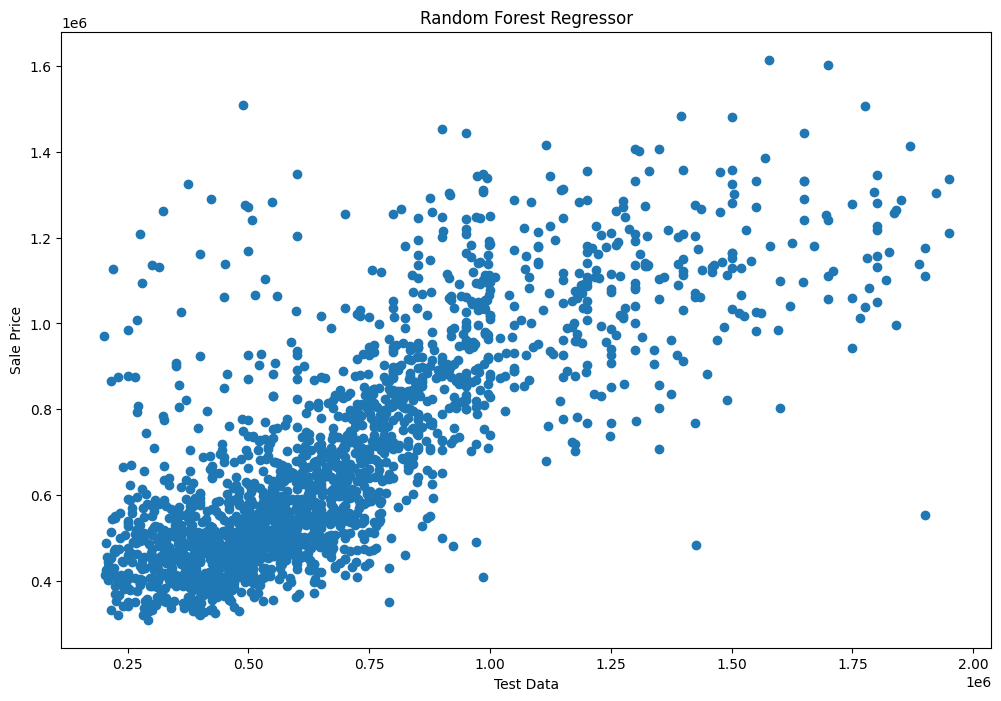

In [ ]:
# prompt: Plot our results from only the randomforest regressor somehow

plt.figure(figsize=(12,8))
plt.title("Random Forest Regressor")
plt.xlabel("Test Data")
plt.ylabel("Sale Price")
plt.scatter(y_test, y_pred_test)
plt.show()


# **Conclusion**
It looks like after using a grid search to optimize hyperparameters we were able to improve test acccuracy by 2 percent. This although was not enough to beat the LightGBM regressor, which remains the most accurate regressor with 62p accuracy on the test set.

In conclusion, 62p accuracy is not very good, this would not be a great model to use in real life. The Root Mean Square Error was 208674, this indicates that on average our model was wrong about the actual sale price by around $208,000 which is definetly not helpful and would provide a poor estimate for people looking to purchase a house in NYC.

To improve my model, somethings we can do...


*   More Feature Engineering
  *   We could list out how much each feature contributed to a correct prediction and try to eliminate features that do not do much and rather focus on features that are well correlated with the sale price.
*   More Hyperparemter tuning
  * Try to optimize hyperparameters of other models (LightGBM) and see how much we can improve test accuracy.
*   Explore different types of models
  * If regression did not work well, we can try to use more complex algorithms such as neural networks and try to create a beter fit model for the data.
  


